In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# 1. Load Data

In [2]:
titanic_train_path = "/kaggle/input/titanic/train.csv"
titanic_test_path = "/kaggle/input/titanic/test.csv"
gender_submission_path = "/kaggle/input/titanic/gender_submission.csv"
titanic_train = pd.read_csv(titanic_train_path)
titanic_test  = pd.read_csv(titanic_test_path)
titanic_gender = pd.read_csv(gender_submission_path)
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


## Exploratory Data Analysis


In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. Preprocess Data

In [7]:
categorical_cols = titanic_train.select_dtypes(['object'])
categorical_cols.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [8]:
categorical_cols = categorical_cols.drop(['Cabin'],axis=1)
categorical_cols.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [9]:
titanic_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
titanic_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
titanic_train['Embarked'].dropna()
titanic_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

label_train = titanic_train.copy()
label_test = titanic_test.copy()

for col in categorical_cols.columns:
    if(col=='Sex'):
        print(col)
        label_train[col] = pd.DataFrame(labelEncoder.fit_transform(titanic_train[col]))
        label_test[col]  = pd.DataFrame(labelEncoder.transform(titanic_test[col]))
    
label_train.head()
label_test.head()

Sex


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
#label_train = label_train.drop(['Cabin','Embarked'],axis=1)
label_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


# Data analysis

## Target Columns

In [14]:
target_col = label_train.Survived
train_data = label_train.drop(['Cabin','Embarked'],axis=1)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000


In [15]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

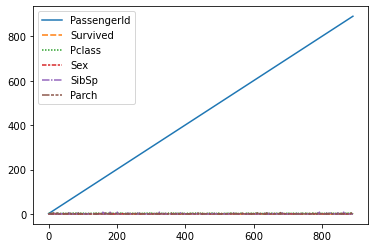

In [16]:
import seaborn as sns
sns.lineplot(data=train_data.select_dtypes(['int']))

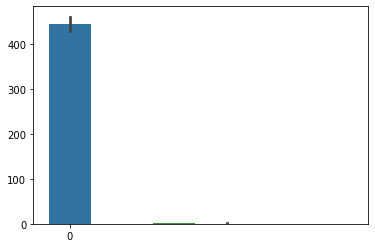

In [17]:
sns.barplot(data=train_data.select_dtypes(['int']))
sns.barplot(data=train_data.Pclass)


In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
def displayBarplot(feature):
    survived = titanic_train[titanic_train['Survived']==1][feature].value_counts()
    dead = titanic_train[titanic_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Not-Survived']
    df.plot(kind='bar',stacked=True)
    #sns.barplot(data=train_data,x=feature,y="Survived",stacked=True,alpha=0.9)
    plt.title('Number of people Survived in each Class')
    plt.ylabel('Count of People survived', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.show()

<Figure size 360x360 with 0 Axes>

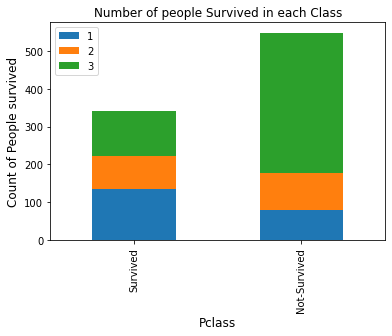

In [19]:
displayBarplot("Pclass")

People from Class 1 more likely to survive that people from class 3

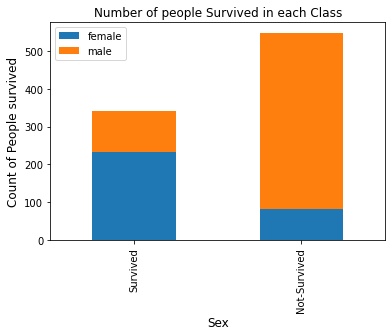

In [20]:
displayBarplot("Sex")

Females survived more than males

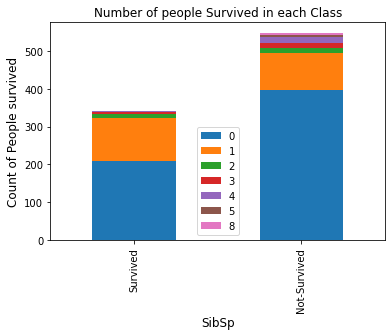

In [21]:
displayBarplot("SibSp")

people with small family were more likely to survive

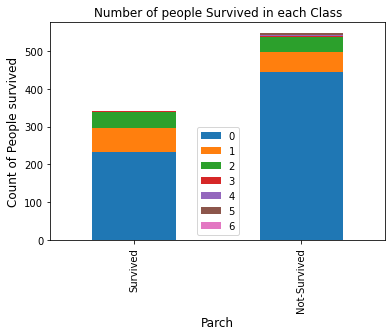

In [22]:
displayBarplot("Parch")

In [23]:
#displayBarplot("Embarked")

# Feature Engineering

## Extract Name title

In [24]:
train_test_data = [titanic_train,titanic_test] #Combining train and test data

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [25]:
titanic_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Jonkheer      1
Don           1
Countess      1
Capt          1
Mme           1
Ms            1
Sir           1
Name: Title, dtype: int64

In [26]:
titanic_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

## Title Mapping
1. Mr     : 0
2. Miss   : 1
3. Mrs    : 2
4. others : 3

In [27]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col":3, "Major":3, "Mlle":3, "Countess":3,
                "Ms":3,"Lady":3, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [28]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


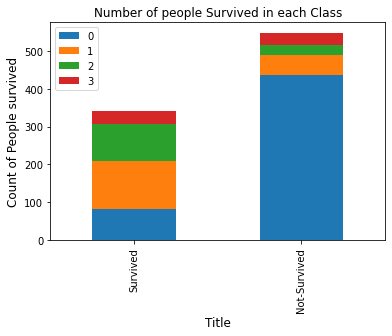

In [30]:
displayBarplot("Title")

Men with title Mr less likely survived
Women with title Mrs more likely survived

In [31]:
titanic_train.drop('Name',axis=1,inplace=True)
titanic_test.drop('Name',axis=1,inplace=True)

In [32]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


## Filling age column

In [33]:
titanic_train["Age"].fillna(titanic_train.groupby("Title")["Age"].transform("median"),inplace=True)
titanic_test["Age"].fillna(titanic_test.groupby("Title")["Age"].transform("median"),inplace=True)
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,2


## Binning age

child : 0
young : 1
adult : 2
midAge: 3
senior: 4

In [34]:
for dataset in train_test_data:
    dataset.loc[ (dataset['Age'] <= 16, 'Age')] = 0
    dataset.loc[((dataset['Age'] >  16 ) & (dataset['Age'] <= 26), 'Age')] = 1
    dataset.loc[((dataset['Age'] >  26 ) & (dataset['Age'] <= 36), 'Age')] = 2
    dataset.loc[((dataset['Age'] >  36 ) & (dataset['Age'] <= 62), 'Age')] = 3
    dataset.loc[ (dataset['Age'] >  62 ,'Age')] = 4

In [35]:
titanic_train['Age'].head(10)

0    1.0
1    3.0
2    1.0
3    2.0
4    2.0
5    2.0
6    3.0
7    0.0
8    2.0
9    0.0
Name: Age, dtype: float64

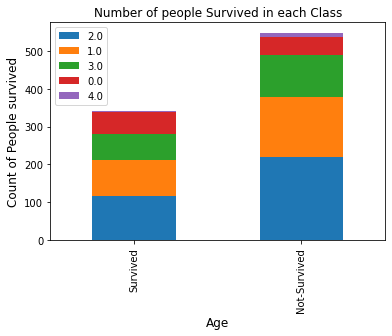

In [36]:
displayBarplot("Age")

older people less likely survived
while adults and younger people more likely survived

In [37]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,male,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,female,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,female,0.0,1,0,237736,30.0708,NaN,C,2


## Map sex

In [38]:
sex = {"female":0, "male":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex)

In [39]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,1,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,1,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,1,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,0,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,0,0.0,1,0,237736,30.0708,NaN,C,2


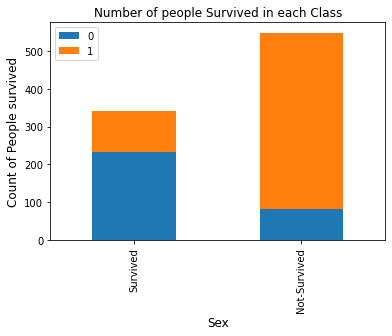

In [40]:
displayBarplot('Sex')

most of females survived
while males are less likely to survive

In [41]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,1,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,1,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,1,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,0,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,0,0.0,1,0,237736,30.0708,NaN,C,2


In [42]:
titanic_train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
D              3
F2             3
              ..
D48            1
B86            1
C46            1
C7             1
A26            1
Name: Cabin, Length: 147, dtype: int64

## fill embarked missing values

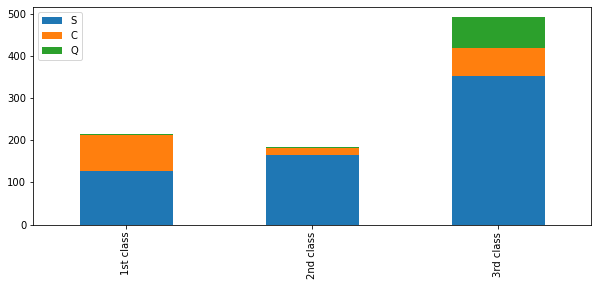

In [43]:
Pclass1 = titanic_train[titanic_train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic_train[titanic_train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic_train[titanic_train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,4))

people from 1st class survived more likely than class 3 people
1st class - economically higher
3rd class - economically lower class
more than 50% people from class 1 are S embarked
more than 50% people from class 2 are S embarked
more than 50% people from class 3 are S embarked

## Thus filling out the empty values with S embarked

In [44]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
titanic_train['Embarked'].isnull().sum()
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,1,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,1,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,1,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,0,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,0,0.0,1,0,237736,30.0708,NaN,C,2


## map embarked

In [45]:
listResult = titanic_train['Embarked'].unique()
titanic_test['Embarked'].unique()
listResult

array(['S', 'C', 'Q'], dtype=object)

In [46]:
embarked_mapping = {"S":0,"C":1,"Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## Fare

In [47]:
titanic_train["Fare"].fillna(titanic_train.groupby("Pclass")["Fare"].transform("median"),inplace=True)
titanic_test["Fare"].fillna(titanic_test.groupby("Pclass")["Fare"].transform("median"),inplace=True)

In [48]:
titanic_train['Fare'].isnull().sum()
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,1,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,1,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,1,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,0,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,0,0.0,1,0,237736,30.0708,NaN,1,2


## binning fare value
* fare < 17 : 0
* fare < 30 : 1
* fare <100 : 2
* fare >100 : 3

In [49]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare']<=17, "Fare"] =0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30),'Fare'] =1
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),'Fare'] =2
    dataset.loc[(dataset['Fare']>100),'Fare'] =3

In [50]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,1,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,1,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,1,3.0,0,0,17463,2.0,E46,0,0
7,8,0,3,1,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,0,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,0,0.0,1,0,237736,2.0,NaN,1,2


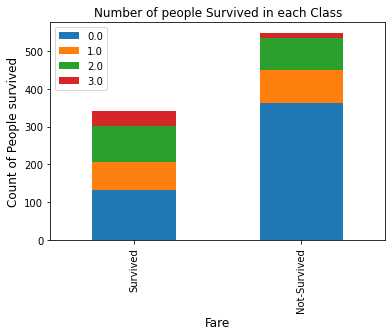

In [51]:
displayBarplot('Fare')

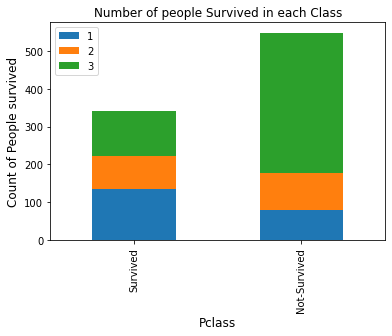

In [52]:
displayBarplot('Pclass')

## Cabin

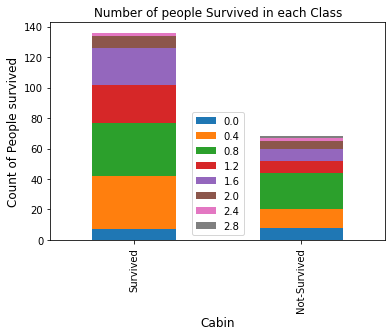

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,1,2.0,0,0,373450,0.0,NaN,0,0
5,6,0,3,1,2.0,0,0,330877,0.0,NaN,2,0
6,7,0,1,1,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,1,0.0,3,1,349909,1.0,NaN,0,3
8,9,1,3,0,2.0,0,2,347742,0.0,NaN,0,2
9,10,1,2,0,0.0,1,0,237736,2.0,NaN,1,2


In [53]:
titanic_train.Cabin.isnull().sum()

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]
    
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2.0,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)
displayBarplot("Cabin")
    
titanic_train.head(10)

In [54]:
titanic_train['Cabin'].fillna(titanic_train.groupby('Pclass')['Cabin'].transform("median"),inplace=True)
titanic_test['Cabin'].fillna(titanic_test.groupby('Pclass')['Cabin'].transform("median"),inplace=True)


In [55]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,0,0
5,6,0,3,1,2.0,0,0,330877,0.0,2.0,2,0
6,7,0,1,1,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,1,0.0,3,1,349909,1.0,2.0,0,3
8,9,1,3,0,2.0,0,2,347742,0.0,2.0,0,2
9,10,1,2,0,0.0,1,0,237736,2.0,1.8,1,2


## Family size column

In [56]:
titanic_train['FamilySize'] = titanic_train['SibSp']+titanic_train['Parch']+1
titanic_test['FamilySize'] = titanic_test['SibSp']+titanic_test['Parch']+1

In [57]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2.0, 7:2.4, 8:2.8}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [58]:
drop_features = ['SibSp','Parch','Ticket']
titanic_train = titanic_train.drop(drop_features,axis=1)
titanic_test = titanic_test.drop(drop_features,axis=1)

titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,0.0,2.0,0,0,0.4
1,2,1,1,0,3.0,2.0,0.8,1,2,0.4
2,3,1,3,0,1.0,0.0,2.0,0,1,0.0
3,4,1,1,0,2.0,2.0,0.8,0,2,0.4
4,5,0,3,1,2.0,0.0,2.0,0,0,0.0
5,6,0,3,1,2.0,0.0,2.0,2,0,0.0
6,7,0,1,1,3.0,2.0,1.6,0,0,0.0
7,8,0,3,1,0.0,1.0,2.0,0,3,1.6
8,9,1,3,0,2.0,0.0,2.0,0,2,0.8
9,10,1,2,0,0.0,2.0,1.8,1,2,0.4


# Predict Output

## Develop a Decision Tree model

In [59]:
from sklearn.tree import DecisionTreeRegressor

train_data_expt_target = pd.DataFrame(titanic_train.drop(['Survived'],axis=1))
#target_col = train_data.Survived
train_model = DecisionTreeRegressor(random_state=1)
train_model.fit(train_data_expt_target.select_dtypes(['int64','float32']),target_col)
#train_data_expt_target.select_dtypes(['int64'])

DecisionTreeRegressor(random_state=1)

In [60]:
#target_col = titanic_test.Survived
#titanic_test.select_dtypes(['int64'])
#titanic_test.insert(1, 'Sex', titanic_gender['Sex'],True)
#titanic_gender
#titanic_test
survival = {0.0:0,1.0:1}
predicted_survival = pd.DataFrame(train_model.predict(titanic_test.select_dtypes(['int64','float32'])))
predicted_survival[0] = predicted_survival[0].map(survival)
predicted_survival

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


# Validating the model

In [61]:
from sklearn.metrics import mean_absolute_error

#predicted_survival = train_model.predict(titanic_test.select_dtypes(['int64']))
mean_absolute_error(titanic_gender['Survived'],predicted_survival)

0.21052631578947367

In [62]:
titanic_gender.Survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# RandomForestRegressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

#train_data_expt_target = pd.DataFrame(train_data.drop(['Survived'],axis=1))
#target_col = train_data.Survived
train_rf_model = RandomForestRegressor(random_state=1)
train_rf_model.fit(train_data_expt_target.select_dtypes(['int64','float32']),target_col)
#train_data_expt_target.select_dtypes(['int64'])

RandomForestRegressor(random_state=1)

In [64]:
predicted_rf_survival = pd.DataFrame(train_rf_model.predict(titanic_test.select_dtypes(['int64','float32'])))
predicted_rf_survival

,0
0,0.12
1,0.69
2,0.12
3,0.01
4,0.69
...,...
413,0.01
414,1.00
415,0.01
416,0.01


In [65]:
survival = {0.0:0,1.0:1}
#predicted_survival = pd.DataFrame(train_model.predict(titanic_test.select_dtypes(['int64','float32'])))
predicted_rf_survival.loc[predicted_rf_survival[0]<1,0] =0
predicted_rf_survival.loc[predicted_rf_survival[0]>=1,0] =1
predicted_rf_survival[0] = predicted_rf_survival[0].map(survival)
predicted_rf_survival

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [66]:
from sklearn.metrics import mean_absolute_error

#predicted_survival = train_model.predict(titanic_test.select_dtypes(['int64']))
mean_absolute_error(titanic_gender['Survived'],predicted_rf_survival)

0.24401913875598086

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=13,metric='euclidean')
knn_model.fit(train_data_expt_target.select_dtypes(['int64','float32']),target_col)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [68]:
predicted_knn_survival = pd.DataFrame(knn_model.predict(titanic_test.select_dtypes(['int64','float32'])))
predicted_knn_survival

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0


In [69]:
mean_absolute_error(titanic_gender['Survived'],predicted_knn_survival)

0.36363636363636365

# SVM

In [70]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(train_data_expt_target.select_dtypes(['int64','float32']),target_col)
predicted_svm_survival = pd.DataFrame(svm_model.predict(titanic_test.select_dtypes(['int64','float32'])))
predicted_svm_survival

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,0
415,0
416,0


In [71]:
mean_absolute_error(titanic_gender['Survived'],predicted_svm_survival)

0.36363636363636365

# Output

In [72]:
#titanic_gender
output = pd.DataFrame({'PassengerId': titanic_test.PassengerId,
                       'Survived': predicted_survival[0]})
output.to_csv('submission.csv', index=False)

In [73]:
submission = pd.read_csv('submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
submission['Survived'].value_counts()

0    274
1    144
Name: Survived, dtype: int64